In [ ]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns

dataikan = pd.read_csv('/content/Marine_Fish_Data.csv')
dataikan.head()

,Species_Name,Region,Breeding_Season,Fishing_Method,Fish_Population,Average_Size(cm),Overfishing_Risk,Water_Temperature(C),Water_Pollution_Level
0,Salmon,North Atlantic,Summer,Net,8270,71.92,No,24.68,High
1,Tuna,Pacific Ocean,Monsoon,Line,1860,85.33,No,21.33,High
2,Cod,Mediterranean Sea,Summer,Line,6390,88.02,No,16.98,Medium
3,Herring,Pacific Ocean,Monsoon,Trawl,6191,85.46,Yes,28.51,Low
4,Herring,Indian Ocean,Monsoon,Trawl,6734,48.35,Yes,25.37,Low


In [ ]:
dataikan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species_Name           500 non-null    object 
 1   Region                 500 non-null    object 
 2   Breeding_Season        500 non-null    object 
 3   Fishing_Method         500 non-null    object 
 4   Fish_Population        500 non-null    int64  
 5   Average_Size(cm)       500 non-null    float64
 6   Overfishing_Risk       500 non-null    object 
 7   Water_Temperature(C)   500 non-null    float64
 8   Water_Pollution_Level  500 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 35.3+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
dataikan_int = dataikan.copy()
encoder = LabelEncoder()

categorical_data = ['Species_Name','Region','Breeding_Season','Fishing_Method','Overfishing_Risk','Water_Pollution_Level']

for kolom in categorical_data:
  dataikan_int[kolom] = encoder.fit_transform(dataikan[kolom])

dataikan_int.head()

,Species_Name,Region,Breeding_Season,Fishing_Method,Fish_Population,Average_Size(cm),Overfishing_Risk,Water_Temperature(C),Water_Pollution_Level
0,3,2,1,1,8270,71.92,0,24.68,0
1,7,3,0,0,1860,85.33,0,21.33,0
2,0,1,1,0,6390,88.02,0,16.98,2
3,1,3,0,2,6191,85.46,1,28.51,1
4,1,0,0,2,6734,48.35,1,25.37,1


In [ ]:
import joblib

joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']

In [ ]:
for kolom in categorical_data:
  print(kolom,dataikan_int[kolom].unique())

Species_Name [3 7 0 1 2 4 5 6]
Region [2 3 1 0]
Breeding_Season [1 0 2]
Fishing_Method [1 0 2]
Overfishing_Risk [0 1]
Water_Pollution_Level [0 2 1]


In [ ]:
dataikan_int.corr()

,Species_Name,Region,Breeding_Season,Fishing_Method,Fish_Population,Average_Size(cm),Overfishing_Risk,Water_Temperature(C),Water_Pollution_Level
Species_Name,1.000000,-0.032789,0.082852,-0.026466,0.008752,0.022403,0.019801,-0.034576,0.003077
Region,-0.032789,1.000000,-0.102387,0.018430,-0.027376,0.020938,0.055406,-0.008053,-0.015357
Breeding_Season,0.082852,-0.102387,1.000000,0.104621,-0.032560,0.058030,0.123253,0.100084,0.021862
Fishing_Method,-0.026466,0.018430,0.104621,1.000000,0.053286,0.020702,0.003801,0.075899,0.066233
Fish_Population,0.008752,-0.027376,-0.032560,0.053286,1.000000,0.090260,0.078519,0.098485,0.072066
Average_Size(cm),0.022403,0.020938,0.058030,0.020702,0.090260,1.000000,0.075431,-0.025343,0.085547
Overfishing_Risk,0.019801,0.055406,0.123253,0.003801,0.078519,0.075431,1.000000,0.081274,-0.003914
Water_Temperature(C),-0.034576,-0.008053,0.100084,0.075899,0.098485,-0.025343,0.081274,1.000000,0.052297
Water_Pollution_Level,0.003077,-0.015357,0.021862,0.066233,0.072066,0.085547,-0.003914,0.052297,1.000000


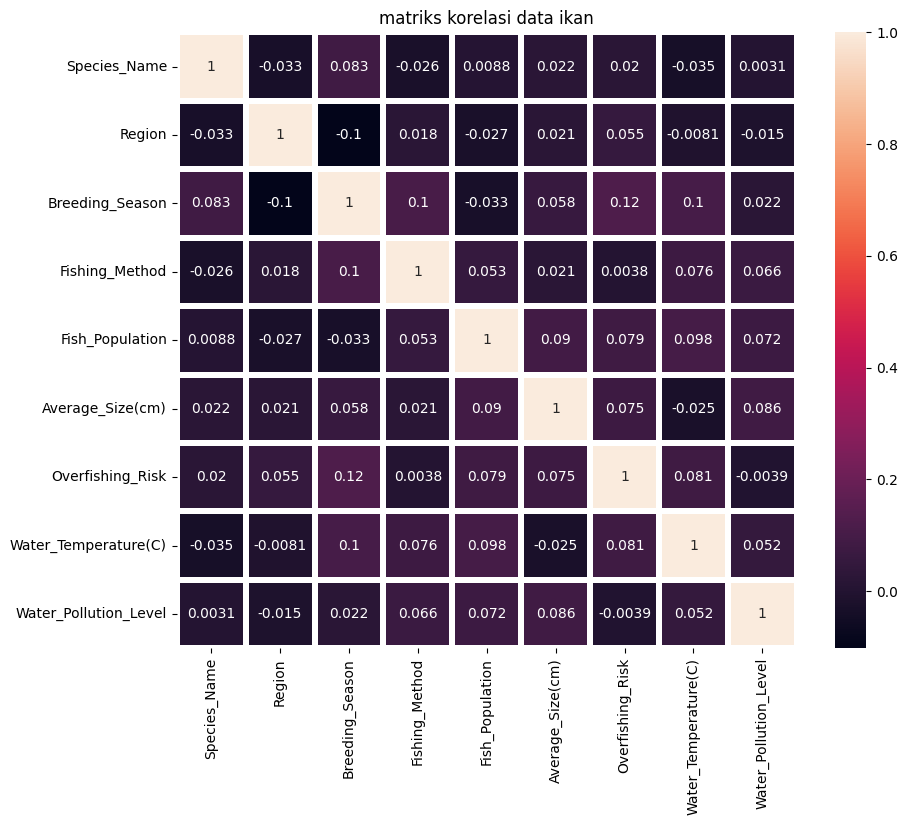

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.title('matriks korelasi data ikan')
sns.heatmap(dataikan_int.corr(), annot=True, linewidths=3)
plt.show()

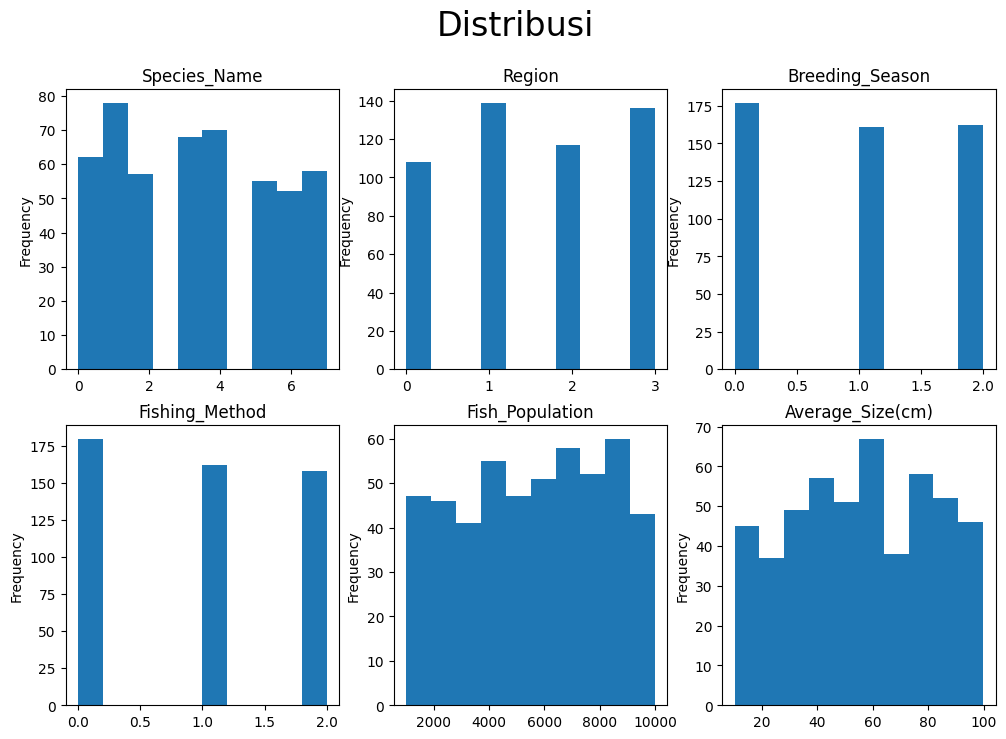

In [ ]:
def distribusi():
  fig,axes= plt.subplots(nrows=2, ncols=3, figsize=(12,8))
  plt.suptitle('Distribusi', fontsize=24)

  def kolom_generator():
    for kolom in dataikan_int:
      yield kolom
  kolom = kolom_generator()

  for i in range(0, 2):
    for j in range(0, 3):
      k = next(kolom)
      dataikan_int[k].plot(kind='hist', ax = axes[i, j])
      axes[i, j].set_title(k)

plt.show()
distribusi()

In [ ]:
dataikan = dataikan_int.drop('Overfishing_Risk',axis=1)
label = dataikan_int['Species_Name']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataikan, label, test_size=0.2)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 8)
(100, 8)
(400,)
(100,)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
prediction = model.predict(x_test)

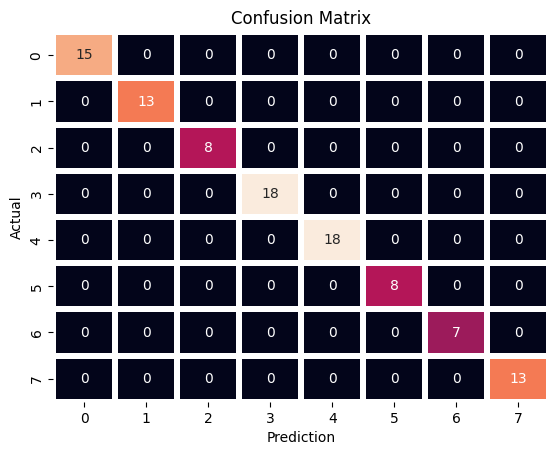

In [ ]:
from sklearn.metrics import confusion_matrix
def display_conf(y_test,prediction):
    sns.heatmap(confusion_matrix(y_test,prediction),annot=True,linewidths=3,cbar=False)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Prediction')
    plt.show()

display_conf(y_test,prediction)

In [ ]:
from sklearn.metrics import r2_score, classification_report
print(f'r2_score :{r2_score(y_test, prediction)}')
print('Classification_report:')
print(classification_report(y_test, prediction,zero_division=0))

r2_score :1.0
Classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00        13

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [ ]:
# Meningkatkan Model
# Menggunakan GridSearchCV untuk menemukan model dengan parameter terbaik

from sklearn.model_selection import GridSearchCV

# SVC Model Hyperparameter
param_grid = {'C':[0.01,0.1,1,10,100],
              'gamma':[100,10,1,0,1,0.01]}

# Membuat model terbaik dari semua kemungkinan kombinasi param_grid
best_model = GridSearchCV(SVC(),param_grid,cv=5,refit=True)

# Melatih model terbaik
best_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [100, 10, 1, 0, 1, 0.01]})

In [ ]:
best_model.best_estimator_

SVC(C=0.01, gamma=100)

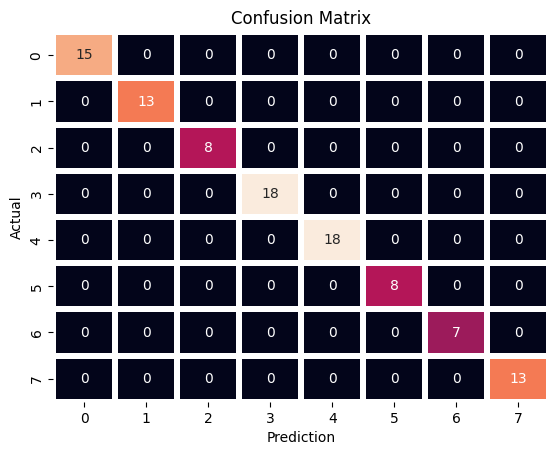

In [ ]:
prediction = grid_search.predict(x_test)
display_conf(y_test, prediction)

In [ ]:
from sklearn.metrics import r2_score, classification_report
print(f'r2_score :{r2_score(y_test, prediction)}')
print('Classification_report:')
print(classification_report(y_test, prediction))

r2_score :1.0
Classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        18
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         7
           7       1.00      1.00      1.00        13

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [ ]:
import pickle
# Menyimpan model menjadi file .pkl
with open('ML_FishData.pkl','wb') as file:
    pickle.dump(best_model,file)

In [ ]:
# Memuat model dalam file .pkl
with open('ML_DrugClassifier.pkl','rb') as file:
    model = pickle.load(file)

In [ ]:
best_model.best_estimator_

SVC(C=0.01, gamma=100)

In [ ]:
import numpy as np
import pandas as pd

def self_prediction():
    try:
        # Meminta input dari pengguna
        Species_Name = int(input('Species_Name (integer): '))
        Region = int(input('Region (integer): '))
        Breeding_Season = int(input('Breeding_Season (integer): '))
        Fishing_Method = int(input('Fishing_Method (integer): '))
        Fish_Population = int(input('Fish_Population (integer): '))
        Average_Size_cm = float(input('Average_Size(cm)(float): '))
        Water_Temperature_C = float(input('Water_Temperature(C)(float): '))
        Water_Pollution_Level = int(input('Water_Pollution_Level (integer): '))

        # Nama fitur yang digunakan saat pelatihan
        feature_names = ['Species_Name', 'Region', 'Breeding_Season', 'Fishing_Method',
                         'Fish_Population', 'Average_Size_cm', 'Water_Temperature_C',
                         'Water_Pollution_Level']

        # Membentuk DataFrame dari input pengguna
        dataikan = pd.DataFrame([[Species_Name, Region, Breeding_Season, Fishing_Method,
                                  Fish_Population, Average_Size_cm, Water_Temperature_C,
                                  Water_Pollution_Level]])

        # Lakukan prediksi
        print('\nPrediction:')
        pred_label = model.predict(dataikan)  # Prediksi menggunakan DataFrame

        pred_fish = encoder.inverse_transform([pred_label])  # Mengubah ke label asli
        print('Prediction:', pred_fish[0])  # Cetak hasil prediksi

    except ValueError:
        print('Error: Pastikan semua input sesuai tipe data yang diminta.')
    except Exception as e:
        print('Error:', e)

# Jalankan fungsi prediksi
self_prediction()

Species_Name (integer): 7
Region (integer): 3
Breeding_Season (integer): 0
Fishing_Method (integer): 0
Fish_Population (integer): 8560
Average_Size(cm)(float): 85.33
Water_Temperature(C)(float): 21.33
Water_Pollution_Level (integer): 0

Prediction:
Prediction: High


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']